### Performing Eda and exploring the dataset to understand the data and its distribution and relationships between the features. as it is given the dataset has noise and missing values 

Basic Thinking - So my approach will be I will first begin with exploring the train.csv dataset, handling missing values, noise, and outliers, followed by performing EDA and normalizing the features. Next, multiple machine learning models, including Random Forest, XGBoost, and SVM, are trained and compared based on their accuracy. The best-performing model is then fine-tuned using GridSearchCV to optimize its parameters while preventing overfitting. After that, the test.csv data undergoes the same preprocessing steps, and predictions are made using the selected model. Finally, the results are saved in submission.csv for final submission.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore') 

df = pd.read_csv('thermoracleTrain.csv') 
df


,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.316003,-1.160519,0.544548,-1.407123,1.427861,0.849849,-1.932329,Category_8,Category_5,1.333760,8.0
59996,0.789506,-2.645345,-0.375569,-2.579966,0.783195,0.671547,-2.041189,Category_14,Category_4,0.170505,3.0
59997,-0.662563,0.642230,-1.175106,-2.783240,-0.902704,-1.694373,-1.824274,Category_8,Category_8,1.010311,5.0
59998,0.475118,-0.021458,2.086274,1.444825,-1.986595,-2.113147,-0.348915,Category_11,Category_9,-0.665345,6.0


In [4]:
df.shape

(60000, 11)

In [5]:
df.dtypes # to ckeck the typ of data


Atmospheric Density              float64
Surface Temperature              float64
Gravity                          float64
Water Content                    float64
Mineral Abundance                float64
Orbital Period                   float64
Proximity to Star                float64
Magnetic Field Strength           object
Radiation Levels                  object
Atmospheric Composition Index    float64
Prediction                       float64
dtype: object

In [6]:
print(df.isnull().sum())

Atmospheric Density              2984
Surface Temperature              3032
Gravity                          2984
Water Content                    3077
Mineral Abundance                2921
Orbital Period                   2997
Proximity to Star                2945
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index    2942
Prediction                       3039
dtype: int64


In [18]:
df.describe()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
count,57016.000000,56968.000000,57016.000000,56923.000000,57079.000000,57003.000000,57055.000000,56942.000000,56979.000000,57058.000000,56961.000000
mean,-0.000202,-0.000288,-0.000469,0.001938,-0.000730,-0.001043,0.000188,9.449879,8.768810,0.000211,4.454381
std,2.263527,1.936598,1.804605,1.689267,1.605524,1.511685,1.316682,2.658860,2.234496,1.120303,2.890055
min,-4.364843,-5.503527,-5.553877,-5.816755,-5.077363,-4.801046,-4.537187,1.000000,1.000000,-4.007504,0.000000
25%,-1.555810,-1.426786,-1.279002,-1.218870,-1.078449,-1.048920,-0.937097,8.000000,7.000000,-0.709852,2.000000
50%,-0.188670,-0.330037,0.046231,-0.004676,0.040008,0.036651,-0.062001,9.000000,9.000000,0.049292,4.000000
75%,1.308113,1.503646,1.255432,1.063391,1.095483,1.058800,0.888149,11.000000,10.000000,0.789511,7.000000
max,9.324018,5.638094,6.030290,6.287045,5.584059,5.111014,4.942699,20.000000,20.000000,3.852567,9.000000


In [19]:
print(df['Prediction'].unique())
print("Number of unique values:", df['Prediction'].nunique())

[ 5.  0.  4.  1.  9.  2. nan  3.  6.  7.  8.]
Number of unique values: 10


In [21]:
for col in df.columns:
    print(f"\
Column: {col}")
  

    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Missing values: {df[col].isnull().sum()}")
    
print("\
Done")

Column: Atmospheric Density
Number of unique values: 57004
Missing values: 2984
Column: Surface Temperature
Number of unique values: 56947
Missing values: 3032
Column: Gravity
Number of unique values: 56998
Missing values: 2984
Column: Water Content
Number of unique values: 56907
Missing values: 3077
Column: Mineral Abundance
Number of unique values: 57057
Missing values: 2921
Column: Orbital Period
Number of unique values: 56982
Missing values: 2997
Column: Proximity to Star
Number of unique values: 57023
Missing values: 2945
Column: Magnetic Field Strength
Number of unique values: 20
Missing values: 3058
Column: Radiation Levels
Number of unique values: 20
Missing values: 3021
Column: Atmospheric Composition Index
Number of unique values: 57034
Missing values: 2942
Column: Prediction
Number of unique values: 10
Missing values: 3039
Done


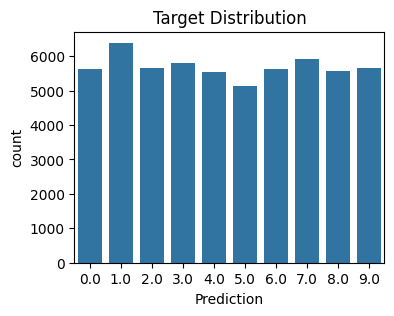

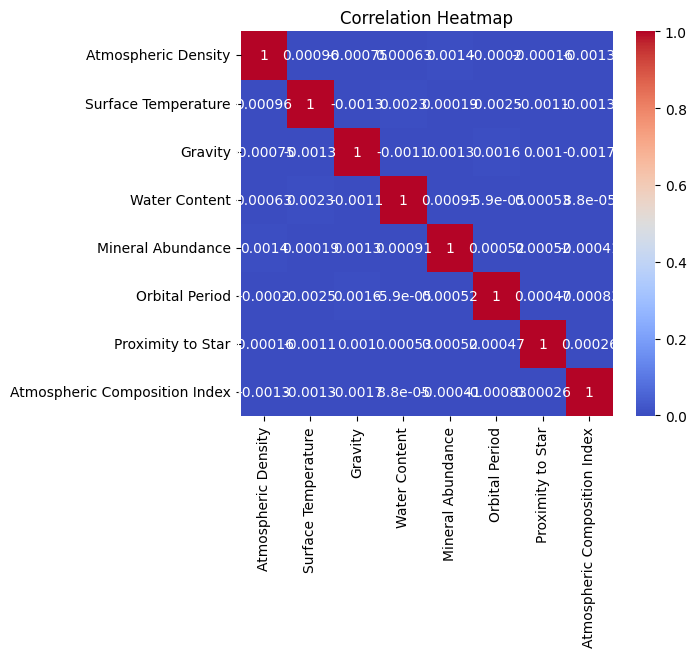

In [23]:

# EDA: steps -  Distribution of target variable
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Prediction')
plt.title("Target Distribution")
plt.show()

# making correlation matrix
numeric_cols = ['Atmospheric Density', 'Surface Temperature', 'Gravity', 'Water Content',
                'Mineral Abundance', 'Orbital Period', 'Proximity to Star',
                'Atmospheric Composition Index']

plt.figure(figsize=(6, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [24]:
import re
from sklearn.preprocessing import MinMaxScaler

# i converted  categorical columns (Magnetic Field Strength, Radiation Levels) from 'Category_X' to numeric value X
categorical_cols = ['Magnetic Field Strength', 'Radiation Levels']


if df[categorical_cols].dtypes[0] == 'object':  
    def extract_number(cat):
        if isinstance(cat, str):
            match = re.search(r'Category_(\d+)', cat)
            return int(match.group(1)) if match else np.nan  
        return cat 

    for col in categorical_cols:
        df[col] = df[col].apply(extract_number)

In [25]:
num_cols = [
    'Atmospheric Density', 'Surface Temperature', 'Gravity', 'Water Content',
    'Mineral Abundance', 'Orbital Period', 'Proximity to Star', 'Atmospheric Composition Index'
] + categorical_cols



In [26]:
num_cols

['Atmospheric Density',
 'Surface Temperature',
 'Gravity',
 'Water Content',
 'Mineral Abundance',
 'Orbital Period',
 'Proximity to Star',
 'Atmospheric Composition Index',
 'Magnetic Field Strength',
 'Radiation Levels']

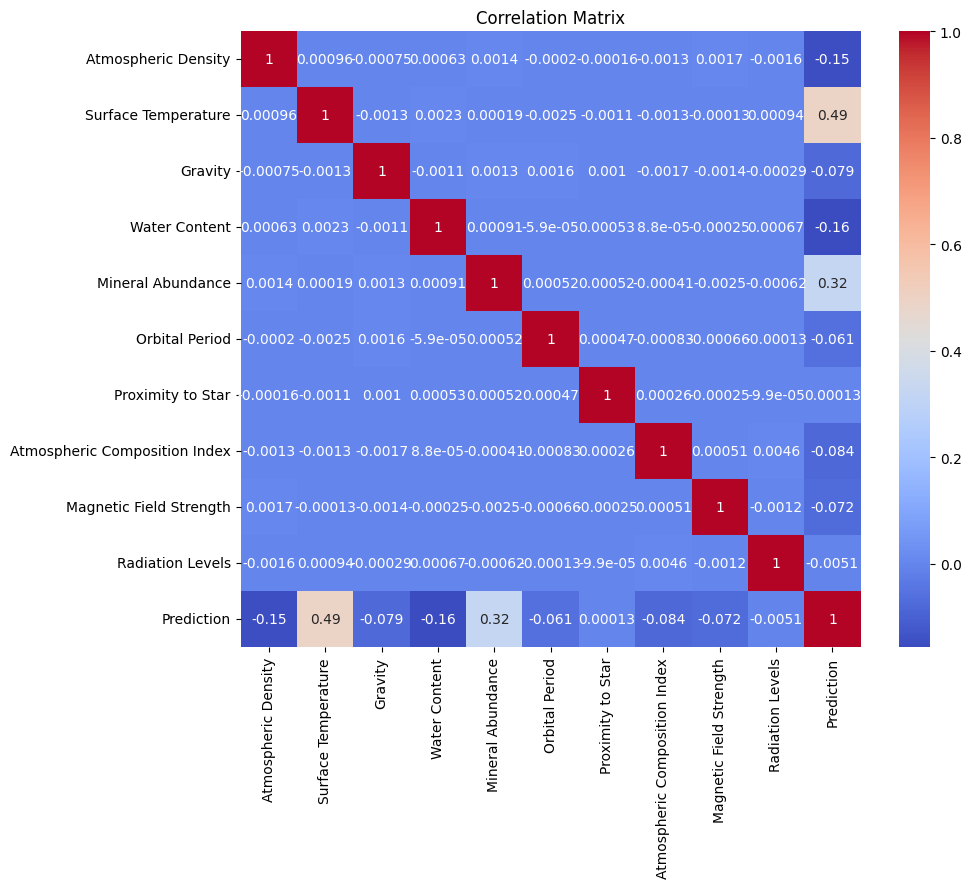

In [27]:
plt.figure(figsize=(10,8))
corr = df[num_cols + ['Prediction']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
df = df.dropna(subset=['Prediction']).copy()

In [29]:
df

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,6.0,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,9.0,9.0,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,8.0,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,11.0,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,6.0,10.0,0.407941,9.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.316003,-1.160519,0.544548,-1.407123,1.427861,0.849849,-1.932329,8.0,5.0,1.333760,8.0
59996,0.789506,-2.645345,-0.375569,-2.579966,0.783195,0.671547,-2.041189,14.0,4.0,0.170505,3.0
59997,-0.662563,0.642230,-1.175106,-2.783240,-0.902704,-1.694373,-1.824274,8.0,8.0,1.010311,5.0
59998,0.475118,-0.021458,2.086274,1.444825,-1.986595,-2.113147,-0.348915,11.0,9.0,-0.665345,6.0


In [31]:
import joblib
num_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=3)), 
    ('scaler', StandardScaler()) 
])



train_df_clean = df.copy()
train_df_clean[num_cols] = num_pipeline.fit_transform(train_df_clean[num_cols])


joblib.dump((num_pipeline, num_cols), "num_pipeline.pkl")

print("Missing values after preprocessing:\n", train_df_clean.isnull().sum())


Missing values after preprocessing:
 Atmospheric Density              0
Surface Temperature              0
Gravity                          0
Water Content                    0
Mineral Abundance                0
Orbital Period                   0
Proximity to Star                0
Magnetic Field Strength          0
Radiation Levels                 0
Atmospheric Composition Index    0
Prediction                       0
dtype: int64


In [32]:
train_df_clean

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.214616,-0.611984,-0.175988,-1.251283,-0.092487,-0.586776,0.691193,1.473947,-1.247078,0.626103,5.0
1,1.861827,-0.603712,1.358328,-0.956481,-1.998287,-0.402612,-0.151108,-0.169851,0.109736,1.149474,0.0
2,-0.052776,0.842548,-0.439755,1.240302,-0.884309,-0.059719,-2.680270,0.841717,-0.342535,-0.609674,4.0
3,-1.382592,-1.198172,0.598744,0.208137,-0.117798,1.948649,-1.508444,0.083041,1.014279,0.099824,1.0
4,-0.643894,1.502773,0.082614,-0.483667,0.313641,0.033666,-0.334103,-1.307865,0.562008,0.369073,9.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.135860,-0.605275,0.303855,-0.843729,0.899216,0.570351,-1.477813,-0.549189,-1.699350,1.204132,8.0
59996,0.355329,-1.377986,-0.210476,-1.544423,0.494601,0.451469,-1.561176,1.726839,-2.151621,0.154913,3.0
59997,-0.289840,0.332883,-0.657404,-1.665865,-0.563529,-1.125985,-1.395067,-0.549189,-0.342535,0.912392,5.0
59998,0.215643,-0.012503,1.165656,0.860115,-1.243818,-1.405198,-0.265274,0.588825,0.109736,-0.598997,6.0


In [33]:
print(df[['Magnetic Field Strength', 'Radiation Levels']].dtypes)



Magnetic Field Strength    float64
Radiation Levels           float64
dtype: object


In [34]:
train_df_clean

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.214616,-0.611984,-0.175988,-1.251283,-0.092487,-0.586776,0.691193,1.473947,-1.247078,0.626103,5.0
1,1.861827,-0.603712,1.358328,-0.956481,-1.998287,-0.402612,-0.151108,-0.169851,0.109736,1.149474,0.0
2,-0.052776,0.842548,-0.439755,1.240302,-0.884309,-0.059719,-2.680270,0.841717,-0.342535,-0.609674,4.0
3,-1.382592,-1.198172,0.598744,0.208137,-0.117798,1.948649,-1.508444,0.083041,1.014279,0.099824,1.0
4,-0.643894,1.502773,0.082614,-0.483667,0.313641,0.033666,-0.334103,-1.307865,0.562008,0.369073,9.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.135860,-0.605275,0.303855,-0.843729,0.899216,0.570351,-1.477813,-0.549189,-1.699350,1.204132,8.0
59996,0.355329,-1.377986,-0.210476,-1.544423,0.494601,0.451469,-1.561176,1.726839,-2.151621,0.154913,3.0
59997,-0.289840,0.332883,-0.657404,-1.665865,-0.563529,-1.125985,-1.395067,-0.549189,-0.342535,0.912392,5.0
59998,0.215643,-0.012503,1.165656,0.860115,-1.243818,-1.405198,-0.265274,0.588825,0.109736,-0.598997,6.0


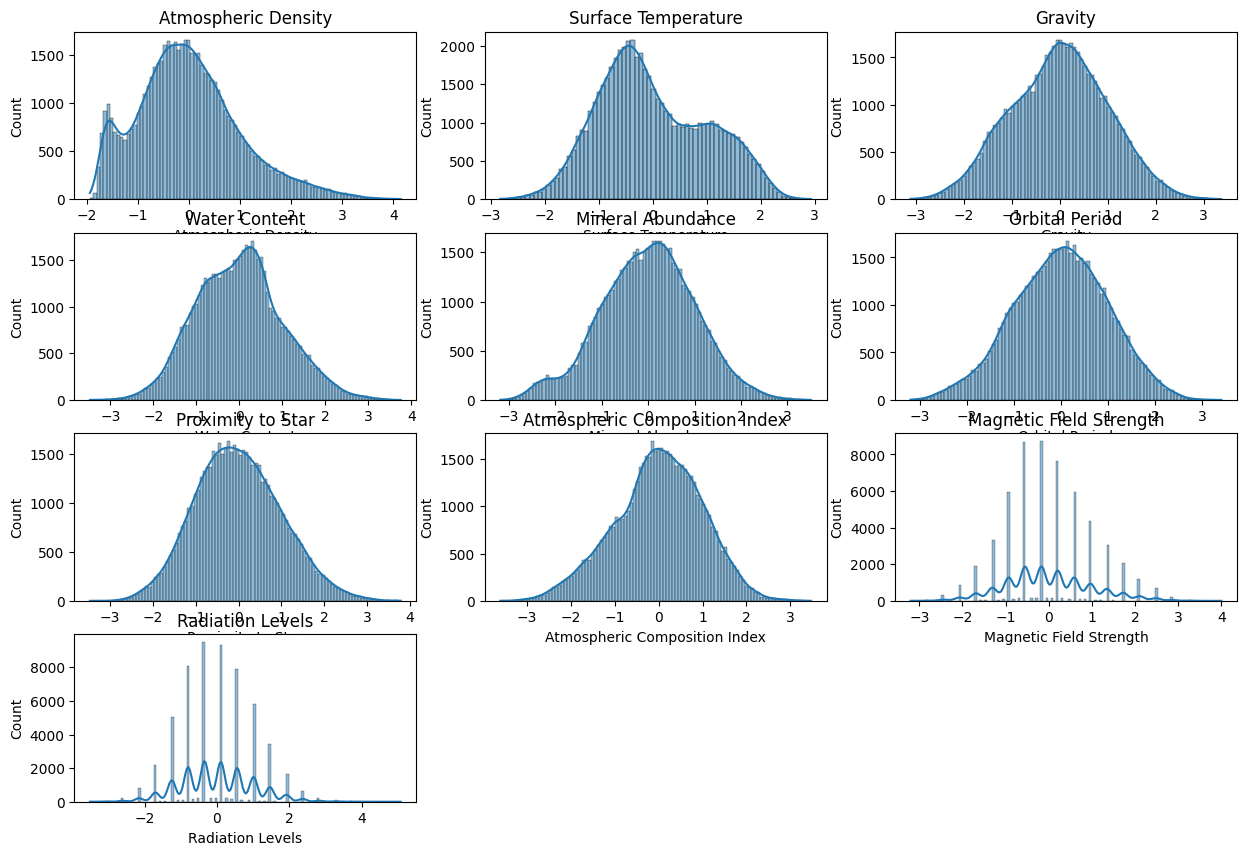

In [35]:
# we will make kde plot as part of eda  to know better dirtribution of the data

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(train_df_clean[col], kde=True)
    plt.title(col)


plt.show()

<Axes: xlabel='Prediction'>

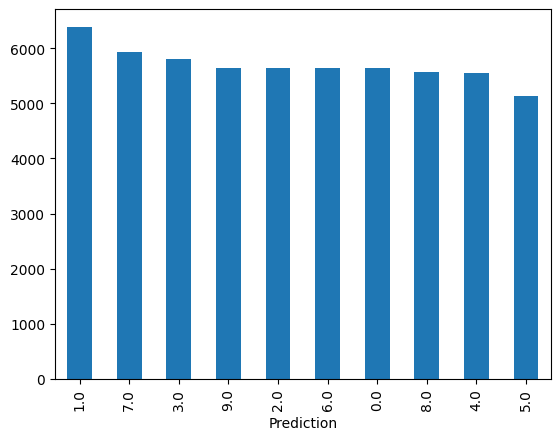

In [36]:
df['Prediction'].value_counts().plot(kind='bar')

In [37]:
train_clean = train_df_clean.dropna(subset=['Prediction']).copy()
train_clean.isnull().sum()

Atmospheric Density              0
Surface Temperature              0
Gravity                          0
Water Content                    0
Mineral Abundance                0
Orbital Period                   0
Proximity to Star                0
Magnetic Field Strength          0
Radiation Levels                 0
Atmospheric Composition Index    0
Prediction                       0
dtype: int64

<Axes: xlabel='Prediction'>

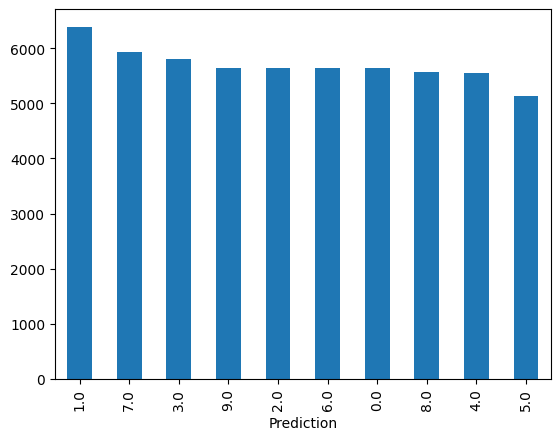

In [38]:
train_df_clean['Prediction'].value_counts().plot(kind='bar')

In [39]:
train_df_clean['Prediction'] = train_df_clean['Prediction'].astype(int)  
print(train_df_clean.dtypes) 


Atmospheric Density              float64
Surface Temperature              float64
Gravity                          float64
Water Content                    float64
Mineral Abundance                float64
Orbital Period                   float64
Proximity to Star                float64
Magnetic Field Strength          float64
Radiation Levels                 float64
Atmospheric Composition Index    float64
Prediction                         int32
dtype: object


In [40]:
# Encode German Target Labels
label_mapping = {
    "Bewohnbar": 0, "Terraformierbar": 1, "Rohstoffreich": 2, "Wissenschaftlich": 3, 
    "Gasriese": 4, "Wüstenplanet": 5, "Eiswelt": 6, "Toxischetmosäre": 7, 
    "Hohestrahlung": 8, "Toterahswelt": 9
}

In [41]:
X = train_df_clean.drop(columns=['Prediction'])  
y = train_df_clean['Prediction']


In [42]:
y

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: Prediction, Length: 56961, dtype: int32

In [43]:
# Splitting data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
# as we know our data is imbalance ham - Handle karenge Class Imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<Axes: xlabel='Prediction'>

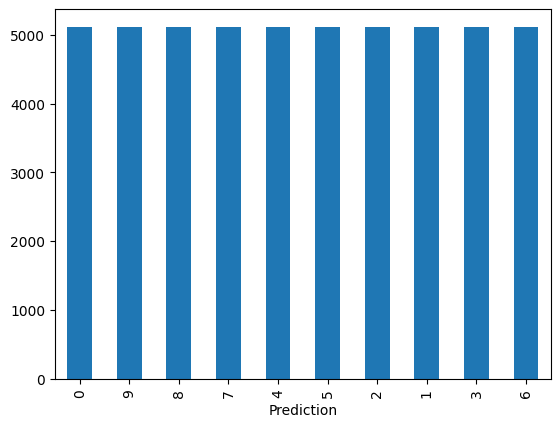

In [45]:
y_train_resampled.value_counts().plot(kind='bar')


In [46]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tqdm import tqdm

# Define the models and their hyperparameters
models = {
    'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.05, 0.1, 0.2]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [5, 10, 15],
            'criterion': ['gini', 'entropy']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.05, 0.1, 0.2]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=500, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15],
            'criterion': ['gini', 'entropy']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.05, 0.1, 0.2]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}  # No hyperparameters for GaussianNB
    },
    'ExtraTrees': {
        'model': ExtraTreesClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [5, 10, 15],
            'criterion': ['gini', 'entropy']
        }
    }
}

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled
)

best_models = {}
model_scores = {}

# Iterate through 10 models
for model_name, config in tqdm(models.items(), desc="🔍 Model Tuning Progress"):
    print(f"\n🔎 Tuning: {model_name}")

    grid = RandomizedSearchCV(
        config['model'], config['params'], cv=3, scoring='accuracy', 
        n_jobs=-1, n_iter=10, random_state=42
    )
    grid.fit(X_train, y_train)
    
    # Store the best model
    best_models[model_name] = grid.best_estimator_

    print(f" Best params: {grid.best_params_}")
    print(f"🔹 Best CV Accuracy: {grid.best_score_:.4f}")

    # Model Evaluation
    y_pred_val = grid.predict(X_val)

    acc = accuracy_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val, average='weighted')
    prec = precision_score(y_val, y_pred_val, average='weighted')
    rec = recall_score(y_val, y_pred_val, average='weighted')

    print(f"🎯 Validation Accuracy: {acc:.4f}")
    print(f"🔹 F1 Score: {f1:.4f}")
    print(f"🔸 Precision: {prec:.4f}")
    print(f"🔺 Recall: {rec:.4f}")
    print("📊 Classification Report:\n", classification_report(y_val, y_pred_val))

    # Store F1 score for best model selection
    model_scores[model_name] = f1

# Select best model based on F1-score
best_model_name = max(model_scores, key=model_scores.get)
best_model = best_models[best_model_name]

print(f"\n🏆 Best Model Selected: {best_model_name} with F1-score: {model_scores[best_model_name]:.4f}")


🔍 Model Tuning Progress:   0%|          | 0/10 [00:00<?, ?it/s]


🔎 Tuning: SVC
 Best params: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
🔹 Best CV Accuracy: 0.9159


🔍 Model Tuning Progress:  10%|█         | 1/10 [02:24<21:43, 144.80s/it]

🎯 Validation Accuracy: 0.9205
🔹 F1 Score: 0.9206
🔸 Precision: 0.9207
🔺 Recall: 0.9205
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1023
           1       0.98      0.99      0.98      1022
           2       0.94      0.93      0.93      1023
           3       0.91      0.90      0.90      1023
           4       0.88      0.89      0.89      1023
           5       0.91      0.92      0.91      1023
           6       0.95      0.94      0.95      1023
           7       0.95      0.94      0.95      1023
           8       0.88      0.89      0.88      1022
           9       0.85      0.86      0.85      1023

    accuracy                           0.92     10228
   macro avg       0.92      0.92      0.92     10228
weighted avg       0.92      0.92      0.92     10228


🔎 Tuning: XGBoost
 Best params: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1}
🔹 Best CV Accuracy: 0.8926


🔍 Model Tuning Progress:  20%|██        | 2/10 [03:41<13:56, 104.58s/it]

🎯 Validation Accuracy: 0.9012
🔹 F1 Score: 0.9012
🔸 Precision: 0.9013
🔺 Recall: 0.9012
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1023
           1       0.97      0.99      0.98      1022
           2       0.92      0.90      0.91      1023
           3       0.88      0.86      0.87      1023
           4       0.86      0.87      0.87      1023
           5       0.88      0.89      0.89      1023
           6       0.93      0.94      0.93      1023
           7       0.94      0.92      0.93      1023
           8       0.85      0.87      0.86      1022
           9       0.83      0.84      0.84      1023

    accuracy                           0.90     10228
   macro avg       0.90      0.90      0.90     10228
weighted avg       0.90      0.90      0.90     10228


🔎 Tuning: RandomForest
 Best params: {'n_estimators': 100, 'max_depth': 15, 'criterion': 'entropy'}
🔹 Best CV Accuracy: 0.8864


🔍 Model Tuning Progress:  30%|███       | 3/10 [06:05<14:20, 122.87s/it]

🎯 Validation Accuracy: 0.8926
🔹 F1 Score: 0.8926
🔸 Precision: 0.8929
🔺 Recall: 0.8926
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1023
           1       0.97      0.98      0.97      1022
           2       0.92      0.89      0.90      1023
           3       0.89      0.85      0.87      1023
           4       0.85      0.84      0.85      1023
           5       0.87      0.89      0.88      1023
           6       0.91      0.94      0.93      1023
           7       0.94      0.91      0.92      1023
           8       0.85      0.86      0.86      1022
           9       0.81      0.83      0.82      1023

    accuracy                           0.89     10228
   macro avg       0.89      0.89      0.89     10228
weighted avg       0.89      0.89      0.89     10228


🔎 Tuning: GradientBoosting
 Best params: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1}
🔹 Best CV Accuracy: 0.8882


🔍 Model Tuning Progress:  40%|████      | 4/10 [58:09<2:10:46, 1307.70s/it]

🎯 Validation Accuracy: 0.8961
🔹 F1 Score: 0.8962
🔸 Precision: 0.8965
🔺 Recall: 0.8961
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1023
           1       0.97      0.98      0.97      1022
           2       0.91      0.89      0.90      1023
           3       0.89      0.86      0.87      1023
           4       0.85      0.86      0.85      1023
           5       0.88      0.89      0.89      1023
           6       0.93      0.93      0.93      1023
           7       0.94      0.91      0.93      1023
           8       0.83      0.87      0.85      1022
           9       0.82      0.83      0.83      1023

    accuracy                           0.90     10228
   macro avg       0.90      0.90      0.90     10228
weighted avg       0.90      0.90      0.90     10228


🔎 Tuning: KNN
 Best params: {'weights': 'distance', 'n_neighbors': 7}
🔹 Best CV Accuracy: 0.9026


🔍 Model Tuning Progress:  50%|█████     | 5/10 [58:19<1:09:57, 839.54s/it] 

🎯 Validation Accuracy: 0.9135
🔹 F1 Score: 0.9135
🔸 Precision: 0.9141
🔺 Recall: 0.9135
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1023
           1       0.97      0.99      0.98      1022
           2       0.95      0.91      0.93      1023
           3       0.92      0.86      0.89      1023
           4       0.90      0.87      0.88      1023
           5       0.90      0.90      0.90      1023
           6       0.93      0.95      0.94      1023
           7       0.94      0.92      0.93      1023
           8       0.86      0.89      0.88      1022
           9       0.83      0.88      0.85      1023

    accuracy                           0.91     10228
   macro avg       0.91      0.91      0.91     10228
weighted avg       0.91      0.91      0.91     10228


🔎 Tuning: LogisticRegression


🔍 Model Tuning Progress:  60%|██████    | 6/10 [58:21<36:59, 554.91s/it]  

 Best params: {'solver': 'lbfgs', 'C': 10}
🔹 Best CV Accuracy: 0.7879
🎯 Validation Accuracy: 0.7941
🔹 F1 Score: 0.7933
🔸 Precision: 0.7931
🔺 Recall: 0.7941
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1023
           1       0.88      0.96      0.92      1022
           2       0.80      0.79      0.79      1023
           3       0.76      0.76      0.76      1023
           4       0.76      0.78      0.77      1023
           5       0.71      0.69      0.70      1023
           6       0.84      0.85      0.84      1023
           7       0.86      0.85      0.86      1023
           8       0.77      0.72      0.75      1022
           9       0.69      0.69      0.69      1023

    accuracy                           0.79     10228
   macro avg       0.79      0.79      0.79     10228
weighted avg       0.79      0.79      0.79     10228


🔎 Tuning: DecisionTree


🔍 Model Tuning Progress:  70%|███████   | 7/10 [58:25<18:43, 374.56s/it]

 Best params: {'max_depth': 15, 'criterion': 'entropy'}
🔹 Best CV Accuracy: 0.8029
🎯 Validation Accuracy: 0.8161
🔹 F1 Score: 0.8163
🔸 Precision: 0.8169
🔺 Recall: 0.8161
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1023
           1       0.96      0.96      0.96      1022
           2       0.84      0.82      0.83      1023
           3       0.78      0.74      0.76      1023
           4       0.77      0.78      0.77      1023
           5       0.75      0.77      0.76      1023
           6       0.87      0.89      0.88      1023
           7       0.87      0.84      0.86      1023
           8       0.74      0.77      0.75      1022
           9       0.72      0.73      0.73      1023

    accuracy                           0.82     10228
   macro avg       0.82      0.82      0.82     10228
weighted avg       0.82      0.82      0.82     10228


🔎 Tuning: AdaBoost
 Best params: {'n_estimato

🔍 Model Tuning Progress:  90%|█████████ | 9/10 [59:01<03:03, 183.56s/it]

🎯 Validation Accuracy: 0.7124
🔹 F1 Score: 0.7154
🔸 Precision: 0.7335
🔺 Recall: 0.7124
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.57      0.69      1023
           1       0.92      0.94      0.93      1022
           2       0.60      0.76      0.67      1023
           3       0.75      0.68      0.71      1023
           4       0.66      0.70      0.68      1023
           5       0.54      0.62      0.58      1023
           6       0.88      0.72      0.79      1023
           7       0.89      0.72      0.79      1023
           8       0.64      0.80      0.71      1022
           9       0.58      0.62      0.60      1023

    accuracy                           0.71     10228
   macro avg       0.73      0.71      0.72     10228
weighted avg       0.73      0.71      0.72     10228


🔎 Tuning: NaiveBayes
 Best params: {}
🔹 Best CV Accuracy: 0.7576
🎯 Validation Accuracy: 0.7615
🔹 F1 Score: 0.7623
🔸 Precision: 0

🔍 Model Tuning Progress: 100%|██████████| 10/10 [59:08<00:00, 354.85s/it]

🎯 Validation Accuracy: 0.8861
🔹 F1 Score: 0.8859
🔸 Precision: 0.8861
🔺 Recall: 0.8861
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1023
           1       0.94      0.98      0.96      1022
           2       0.92      0.89      0.90      1023
           3       0.86      0.84      0.85      1023
           4       0.85      0.84      0.84      1023
           5       0.87      0.89      0.88      1023
           6       0.90      0.94      0.92      1023
           7       0.93      0.91      0.92      1023
           8       0.85      0.83      0.84      1022
           9       0.81      0.82      0.81      1023

    accuracy                           0.89     10228
   macro avg       0.89      0.89      0.89     10228
weighted avg       0.89      0.89      0.89     10228


🏆 Best Model Selected: SVC with F1-score: 0.9206


In [47]:
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


svc_model = SVC(random_state=42)
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}


grid = GridSearchCV(svc_model, svc_params, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)


best_svc = grid.best_estimator_


joblib.dump(best_svc, 'best_svc_Model.pkl')

print(f" Best SVC model saved as 'best_svc_Model.pkl' with params: {grid.best_params_}")


 Best SVC model saved as 'best_svc_Model.pkl' with params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}



Tuning: SVC

Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Best CV Accuracy: 0.9042

Validation Accuracy: 0.9042

F1 Score: 0.9043

Precision: 0.9046

Recall: 0.9042





In [48]:
y_val

26543    4
40839    8
25676    8
22439    1
1345     9
        ..
32657    6
38973    7
12622    4
46081    0
33806    4
Name: Prediction, Length: 10228, dtype: int32

In [50]:
import pandas as pd
import joblib
import numpy as np
import re

test_df = pd.read_csv("cosmictest.csv")


categorical_cols = ['Magnetic Field Strength', 'Radiation Levels']

if test_df[categorical_cols].dtypes[0] == 'object':  
    def extract_number(cat_val):
        if isinstance(cat_val, str):
            match = re.search(r'Category_(\d+)', cat_val)
            return int(match.group(1)) if match else np.nan 
        return cat_val 

    for col in categorical_cols:
        test_df[col] = test_df[col].apply(extract_number)


num_pipeline, num_cols = joblib.load("num_pipeline.pkl")


test_df[num_cols] = num_pipeline.transform(test_df[num_cols])




In [51]:
# Print the feature names used during training
print("Expected Features from Model:", best_model.feature_names_in_)
print("Test Data Columns:", test_df.columns)


Expected Features from Model: ['Atmospheric Density' 'Surface Temperature' 'Gravity' 'Water Content'
 'Mineral Abundance' 'Orbital Period' 'Proximity to Star'
 'Magnetic Field Strength' 'Radiation Levels'
 'Atmospheric Composition Index']
Test Data Columns: Index(['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star', 'Magnetic Field Strength', 'Radiation Levels',
       'Atmospheric Composition Index'],
      dtype='object')


In [52]:
test_df

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-0.574425,1.524771,-0.094472,-0.732085,-1.216243,0.637441,1.181808,1.347501,-1.247078,-0.657142
1,0.040588,-1.951495,-0.335312,0.931007,-0.122458,-1.226364,0.840707,0.588825,0.562008,-0.307216
2,-1.643825,-0.880605,0.144517,0.606338,-1.311583,0.233508,-0.070241,-0.169851,0.109736,-0.479318
3,2.154472,0.229156,0.555825,-0.233243,-0.510407,-1.265750,2.090792,0.209487,0.109736,-0.184284
4,0.334318,1.456984,-0.640440,1.476075,-0.364729,0.590917,-1.485880,0.588825,-1.247078,0.689403
...,...,...,...,...,...,...,...,...,...,...
9995,0.531149,-1.118158,-0.082064,0.628056,2.012631,2.490592,2.376579,0.588825,-1.699350,-0.132183
9996,1.007618,-1.413726,-1.798079,-0.453065,0.292355,-0.525063,2.048163,2.485516,-0.342535,-0.140558
9997,-0.466251,1.216755,0.777885,-0.975227,1.656341,0.429545,-0.124754,-1.307865,0.109736,-2.838556
9998,-0.542635,-0.222977,1.408614,-0.596620,-0.359136,-0.718661,0.489236,0.588825,1.014279,-0.760962


In [53]:

test_df_clean = test_df[best_model.feature_names_in_]
test_df_clean


,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-0.574425,1.524771,-0.094472,-0.732085,-1.216243,0.637441,1.181808,1.347501,-1.247078,-0.657142
1,0.040588,-1.951495,-0.335312,0.931007,-0.122458,-1.226364,0.840707,0.588825,0.562008,-0.307216
2,-1.643825,-0.880605,0.144517,0.606338,-1.311583,0.233508,-0.070241,-0.169851,0.109736,-0.479318
3,2.154472,0.229156,0.555825,-0.233243,-0.510407,-1.265750,2.090792,0.209487,0.109736,-0.184284
4,0.334318,1.456984,-0.640440,1.476075,-0.364729,0.590917,-1.485880,0.588825,-1.247078,0.689403
...,...,...,...,...,...,...,...,...,...,...
9995,0.531149,-1.118158,-0.082064,0.628056,2.012631,2.490592,2.376579,0.588825,-1.699350,-0.132183
9996,1.007618,-1.413726,-1.798079,-0.453065,0.292355,-0.525063,2.048163,2.485516,-0.342535,-0.140558
9997,-0.466251,1.216755,0.777885,-0.975227,1.656341,0.429545,-0.124754,-1.307865,0.109736,-2.838556
9998,-0.542635,-0.222977,1.408614,-0.596620,-0.359136,-0.718661,0.489236,0.588825,1.014279,-0.760962


In [54]:

test_df_clean = test_df_clean[best_model.feature_names_in_]


test_df_clean = test_df_clean.astype(np.float64)

y_test_pred = best_model.predict(test_df_clean)

print("✅ Predictions completed successfully!")


✅ Predictions completed successfully!


In [55]:
y_test_pred

array([7, 2, 1, ..., 4, 5, 6])

In [56]:

label_to_planet = {
    0: "Bewohnbar", 1: "Terraformierbar", 2: "Rohstoffreich", 3: "Wissenschaftlich",
    4: "Gasriese", 5: "Wüstenplanet", 6: "Eiswelt", 7: "Toxischeatmosphäre",
    8: "Hohestrahlung", 9: "Toterahswelt"
}

y_test_pred_mapped = [label_to_planet[int(label)] for label in y_test_pred]


In [57]:

if 'Planet_ID' in test_df.columns:
    submission_df = pd.DataFrame({'Planet_ID': test_df['Planet_ID'], 'Predicted_Class': y_test_pred_mapped})
else:
  
    test_df_clean['Planet_ID'] = test_df_clean.index  
    
    submission_df = pd.DataFrame({'Planet_ID': test_df_clean['Planet_ID'], 'Predicted_Class': y_test_pred_mapped})


submission_df.to_csv('Final_predictions.csv', index=False)

print("🚀 Predictions saved to 'Final_predictions.csv' successfully!")


🚀 Predictions saved to 'Final_predictions.csv' successfully!


In [ ]:
# predictions.csv file looks like - 

# Planet_id,Prediction,Category
# 1,Toxischeatmosphäre
# 2,Rohstoffreich
# 3,Terraformierbar
# 4,Bewohnbar
# 5,Gasriese
# 6,Terraformierbar
# 7,Gasriese

# ... so on


#### Apologies for the lack of proper formatting and clean code. I rushed through it since I only just found out about the competition after registering late. I'll make sure to do better in Round 2!

In [ ]:
# import pandas as pd
# import numpy as np
# import re
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import KNNImputer
# from sklearn.pipeline import Pipeline
# import joblib  # To load the trained model


# test_df = pd.read_csv('Test.csv')

# categorical_cols = ['Magnetic Field Strength', 'Radiation Levels']

# def extract_number(cat_val):
#     if isinstance(cat_val, str):
#         match = re.search(r'Category_(\d+)', cat_val)
#         if match:
#             return int(match.group(1))
#     return np.nan

# for col in categorical_cols:
#     test_df[col + '_num'] = test_df[col].apply(extract_number)

# num_cols = ['Atmospheric Density', 'Surface Temperature', 'Gravity', 'Water Content',
#             'Mineral Abundance', 'Orbital Period', 'Proximity to Star', 'Atmospheric Composition Index']
# num_cols += [col + '_num' for col in categorical_cols]


# num_pipeline = Pipeline([
#     ('imputer', KNNImputer(n_neighbors=3)),
#     ('scaler', StandardScaler())
# ])

# test_df_clean = test_df.copy()
# test_df_clean[num_cols] = num_pipeline.fit_transform(test_df_clean[num_cols])

# best_model = joblib.load('best_svc_model.pkl')  # Ensure you saved your best model during training


# y_test_pred = best_model.predict(test_df_clean[num_cols])


# label_to_planet = {
#     0: "Bewohnbar", 1: "Terraformierbar", 2: "Rohstoffreich", 3: "Wissenschaftlich",
#     4: "Gasriese", 5: "Wüstenplanet", 6: "Eiswelt", 7: "Toxischetmosäre",
#     8: "Hohestrahlung", 9: "Toterahswelt"
# }


# y_test_pred_mapped = [label_to_planet[int(label)] for label in y_test_pred]

# submission_df = pd.DataFrame({'Planet_ID': test_df['Planet_ID'], 'Predicted_Class': y_test_pred_mapped})
# submission_df.to_csv('predictions.csv', index=False)

# print("Predictions saved to predictions.csv")
